<ipython-input-1-901b0ce24b4b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Amount', data=df, palette='Set2')


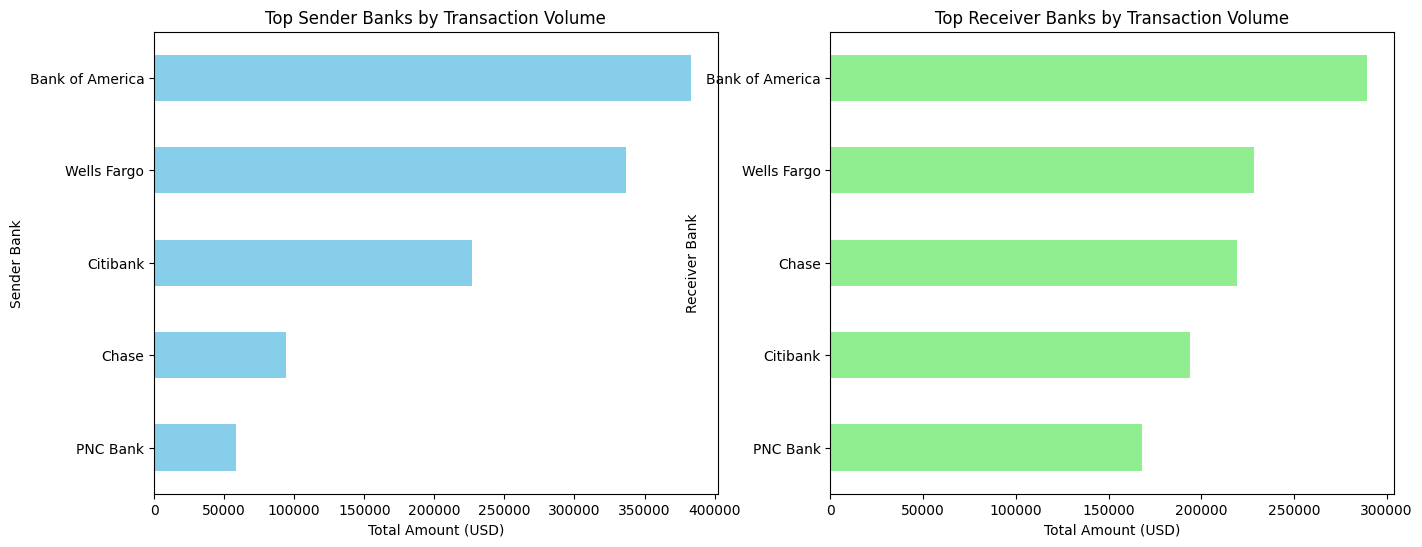

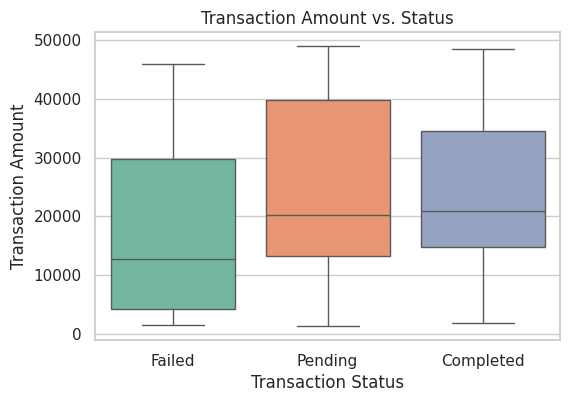

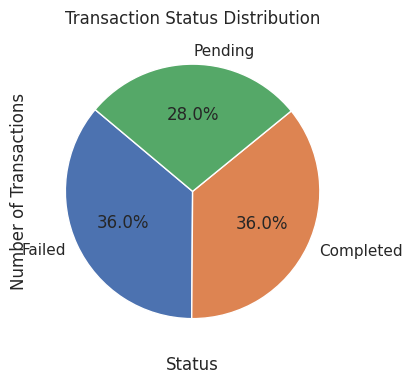

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BankWirePayments.csv')

# Top N to display
TOP_N = 10

# Group by SenderBank and sum Amount
top_sender_banks = df.groupby('SenderBank')['Amount'].sum().nlargest(TOP_N)

# Group by ReceiverBank and sum Amount
top_receiver_banks = df.groupby('ReceiverBank')['Amount'].sum().nlargest(TOP_N)

# Set up subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot Sender Banks
top_sender_banks.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top Sender Banks by Transaction Volume')
axes[0].set_xlabel('Total Amount (USD)')
axes[0].set_ylabel('Sender Bank')

# Plot Receiver Banks
top_receiver_banks.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Top Receiver Banks by Transaction Volume')
axes[1].set_xlabel('Total Amount (USD)')
axes[1].set_ylabel('Receiver Bank')

sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Amount', data=df, palette='Set2')

# Add labels and title
plt.title('Transaction Amount vs. Status', fontsize=12)
plt.xlabel('Transaction Status')
plt.ylabel('Transaction Amount')

status_counts = df['Status'].value_counts()

# Pie chart
plt.figure(figsize=(6, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

status_counts = df['Status'].value_counts()
plt.tight_layout()
plt.show()


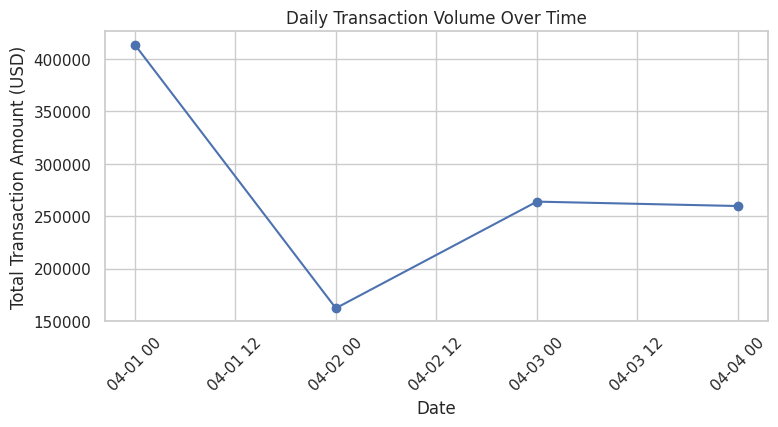

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('BankWirePayments.csv')


df['Date'] = pd.to_datetime(df['Date'])  # Replace 'Date' with the actual column name

# Group by Date and sum Amount
daily_volume = df.groupby('Date')['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(daily_volume['Date'], daily_volume['Amount'], marker='o', linestyle='-')
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [3]:
import plotly.express as px
import pandas as pd

# Load the transaction data
df = pd.read_csv('BankWirePayments.csv')

# If your Region column contains state names, map to state codes
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add state codes
df['StateCode'] = df['Region'].map(us_state_abbrev)

df = df.groupby('StateCode')['Amount'].sum().reset_index(name='TransactionVolume')

# Create choropleth
fig = px.choropleth(
    df,
    locations='StateCode',
    locationmode='USA-states',
    color='TransactionVolume',
    scope='usa',
    color_continuous_scale='Greens',
    labels={'TransactionVolume': 'Transaction Volume'},
    title='Transaction Volume by U.S. State'
)

fig.update_layout(
    geo=dict(showlakes=True, lakecolor='rgb(355, 355, 355)'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [4]:
import pandas as pd

# Load the transaction data
df = pd.read_csv('BankWirePayments.csv')

print("🔹 Data Shape:", df.shape)

print("\n🔹 Data Types:\n", df.dtypes)

print("\n🔹 Summary Statistics:\n", df.describe())

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Percentage (%)', ascending=False)

print("\n🔹 Missing Values and Percentages:\n", missing_df)

categorical_cols = df.select_dtypes(include='object').columns
print("\n🔹 Unique Value Count per Categorical Column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

numerical_cols = df.select_dtypes(include='number')
correlation_matrix = numerical_cols.corr()

print("\n🔹 Correlation Matrix:\n", correlation_matrix)

🔹 Data Shape: (50, 49)

🔹 Data Types:
 TransactionID           object
Date                    object
Amount                 float64
Currency                object
PaymentType             object
Status                  object
SenderName              object
SenderTIN               object
SenderBank              object
SenderBankRouting        int64
SenderAccountNo         object
ReceiverName            object
ReceiverTIN             object
ReceiverBank            object
ReceiverBankRouting      int64
ReceiverAccountNo       object
BusinessCategory        object
TransactionFee         float64
IsInternational           bool
Notes                   object
ProcessedBy             object
BankBranch              object
Region                  object
Channel                 object
Purpose                 object
CustomerSegment         object
SettlementDate          object
FXRate                   int64
OriginalCurrency        object
ChargeBearer            object
SwiftCode               object


In [5]:
import pandas as pd

# Convert 'Date' column to datetime objects
try:
    df['Date'] = pd.to_datetime(df['Date'])
except ValueError:
    print("Error converting 'Date' column to datetime. Check for inconsistent date formats.")
    # Handle the error appropriately, e.g., try different date formats or remove problematic rows.

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle outliers in 'Amount' column
amount_99th = df['Amount'].quantile(0.99)
df['Amount'] = df['Amount'].clip(upper=amount_99th)

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Feature Engineering
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['TransactionAmountCategory'] = pd.cut(df['Amount'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Categorical Encoding
categorical_cols = ['Currency', 'PaymentType', 'Status', 'FraudCheck', 'OriginatingSystem']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Data Scaling/Normalization (Example: MinMaxScaler for 'Amount')
scaler = MinMaxScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Data Type Handling (Example: ensuring 'TransactionFee' is numeric)
# Note: The following is commented out because the error handling is not provided.
# if df['TransactionFee'].dtype != 'number':
#     try:
#         df['TransactionFee'] = pd.to_numeric(df['TransactionFee'], errors='coerce')
#     except:
#         print("Error converting 'TransactionFee' to numeric")
display(df.head())

,TransactionID,Date,Amount,Currency,PaymentType,Status,SenderName,SenderTIN,SenderBank,SenderBankRouting,...,LinkedTxn,CustomField1,CustomField2,CustomField3,ReferenceNumber,FraudCheck,OriginatingSystem,DayOfWeek,TransactionAmountCategory,Amount_Scaled
0,385abb80-6e34-413b-ab6b-676da1a6bd51,2025-04-01,2120.55,0,0,1,"Ellis, Wilkerson and Bryant",52-4302281,PNC Bank,76534924,...,589599a9-f69b-41ab-9d4f-fe1657a44ddd,just,or,no,bf425015-2779-4e48-95de-3e411a9fa93f,0,2,1,Low,0.018184
1,dce55671-cf04-47b1-8b10-03713a19368c,2025-04-02,12209.82,0,1,2,Li LLC,47-7059353,Chase,59179018,...,139e7e47-7ff6-4b22-80ae-5415e0d6840b,night,because,case,476ba863-ff10-49a0-813c-f8154854ca84,1,1,2,High,0.230124
2,d98c706f-7603-4b26-91b8-ce725e119eb5,2025-04-04,7956.33,0,0,1,"Stewart, Holland and Dunlap",56-2509712,PNC Bank,85656673,...,020b65b9-5435-4a22-976b-84b2af5d085d,system,maybe,network,fc91be4f-5789-4d70-90fb-495a26d245b7,0,1,4,Medium,0.140773
3,1830bd2b-1f96-403b-bfe8-85198ab927ae,2025-04-01,30352.59,0,0,1,Willis Inc,94-3075453,Bank of America,44697835,...,56fb6904-f740-4223-bd81-4163135a6abf,rich,who,opportunity,02822514-b976-4ae6-b1cc-72511772c5e6,0,2,1,Very High,0.611240
4,44caf12b-69dc-46ae-ae5d-eb768c648394,2025-04-01,37820.78,0,1,1,Robertson Group,95-7416488,Bank of America,120187243,...,f24ea85f-3859-4456-8b4a-9b7f51101a82,off,term,whole,d2389544-1086-4136-b431-12cedf0ce911,1,1,1,Very High,0.768120


In [7]:
import pandas as pd

# Descriptive statistics for numerical features
numerical_features = ['Amount', 'Amount_Scaled', 'DayOfWeek', 'TransactionFee', 'AMLScore', 'TaxWithheld']
numerical_stats = df[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:\n", numerical_stats)

# Analyze categorical features
categorical_features = ['Currency', 'PaymentType', 'Status', 'FraudCheck', 'OriginatingSystem', 'TransactionAmountCategory']
for col in categorical_features:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")

# Explore relationships between variables
print("\nCorrelation Matrix for Numerical Features:\n", df[numerical_features].corr())

# Relationship between 'Amount' and 'FraudCheck'
print("\nRelationship between Amount and FraudCheck:")
print(df.groupby('FraudCheck')['Amount'].describe())

# Relationship between 'TransactionAmountCategory' and 'FraudCheck'
print("\nRelationship between TransactionAmountCategory and FraudCheck:")
print(pd.crosstab(df['TransactionAmountCategory'], df['FraudCheck'], normalize='index'))

# Additional relationships (example)
print("\nRelationship between PaymentType and FraudCheck:")
print(pd.crosstab(df['PaymentType'], df['FraudCheck'], normalize='index'))

Descriptive Statistics for Numerical Features:
              Amount  Amount_Scaled  DayOfWeek  TransactionFee   AMLScore  \
count     50.000000      50.000000  50.000000       50.000000  50.000000   
mean   21987.988386       0.435529   2.340000       25.807000   0.527600   
std    15341.886020       0.322279   1.205599       13.735674   0.255379   
min     1254.900000       0.000000   1.000000        2.670000   0.110000   
25%     8515.120000       0.152512   1.000000       14.880000   0.292500   
50%    18659.020000       0.365599   2.000000       25.945000   0.550000   
75%    35992.830000       0.729721   3.000000       38.535000   0.717500   
max    48859.289300       1.000000   4.000000       48.810000   0.960000   

       TaxWithheld  
count    50.000000  
mean    110.936200  
std      58.780599  
min       0.850000  
25%      58.982500  
50%     111.975000  
75%     162.640000  
max     199.700000  

Value Counts for Currency:
Currency
0    50
Name: count, dtype: int64

Value 

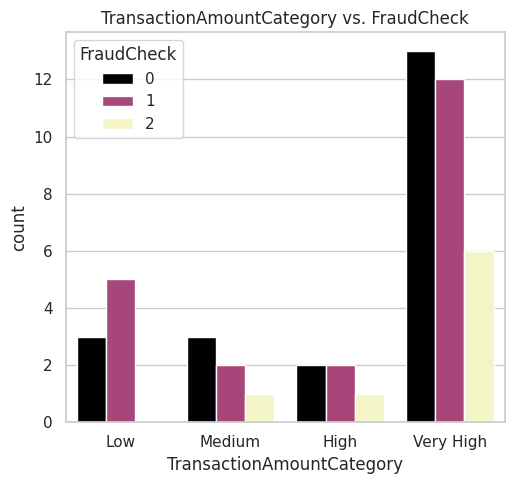

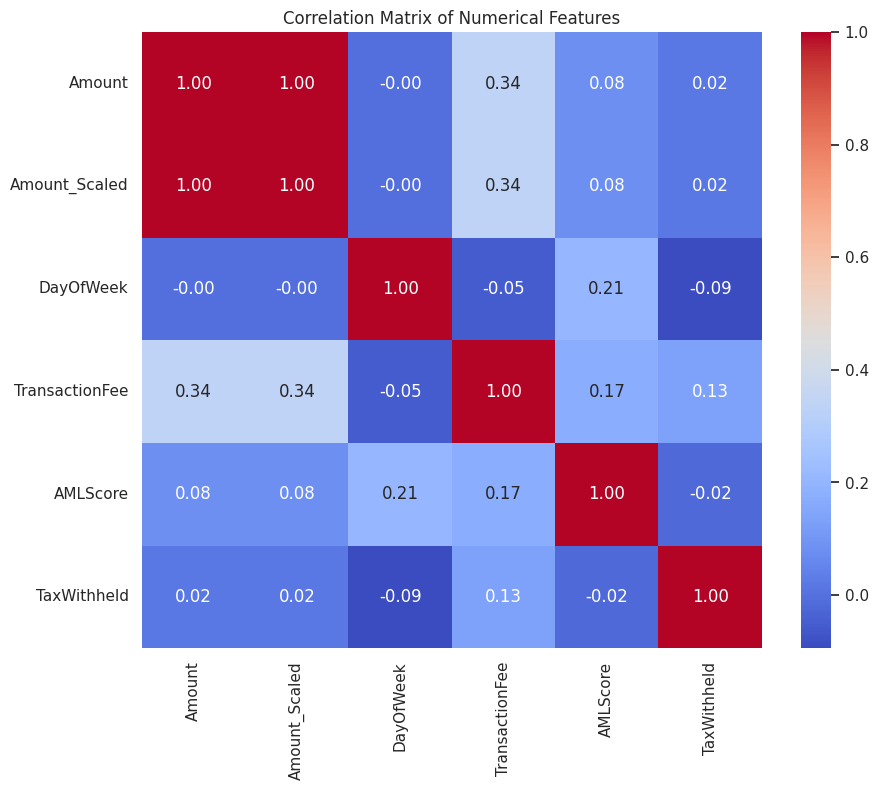

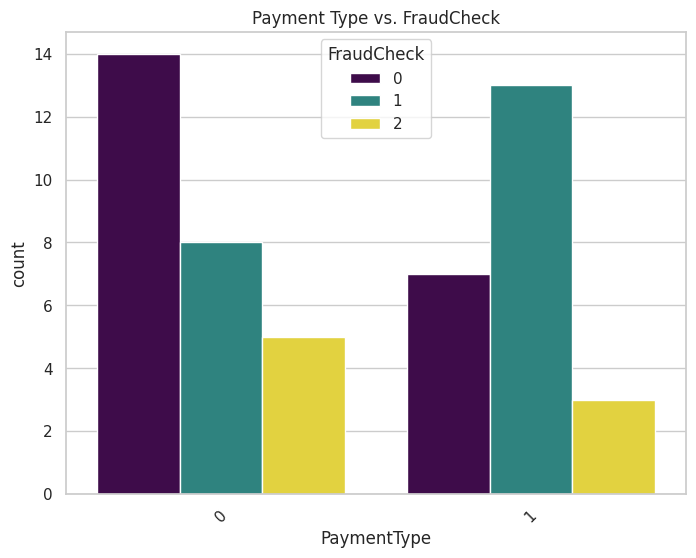

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationships between variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.countplot(x='TransactionAmountCategory', hue='FraudCheck', data=df, palette='magma')
plt.title('TransactionAmountCategory vs. FraudCheck')

plt.tight_layout()
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between PaymentType and FraudCheck
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentType', hue='FraudCheck', data=df, palette='viridis')
plt.title('Payment Type vs. FraudCheck')
plt.xticks(rotation=45)
plt.show()